## Classification task

### Libraries

In [1]:
import pandas as pd
import torch
import os


from classification_code.Classification import analyze_class_imbalance, balance_dataset, main_classifier
from classification_code.Autoencoder import Autoencoder
from classification_code.utils import OurDataset


### Exploring the classes imbalance

Class Distribution:
Class 0: 85306 samples (15.46%)
Class 1: 466356 samples (84.54%)

Imbalance Ratio: 5.47


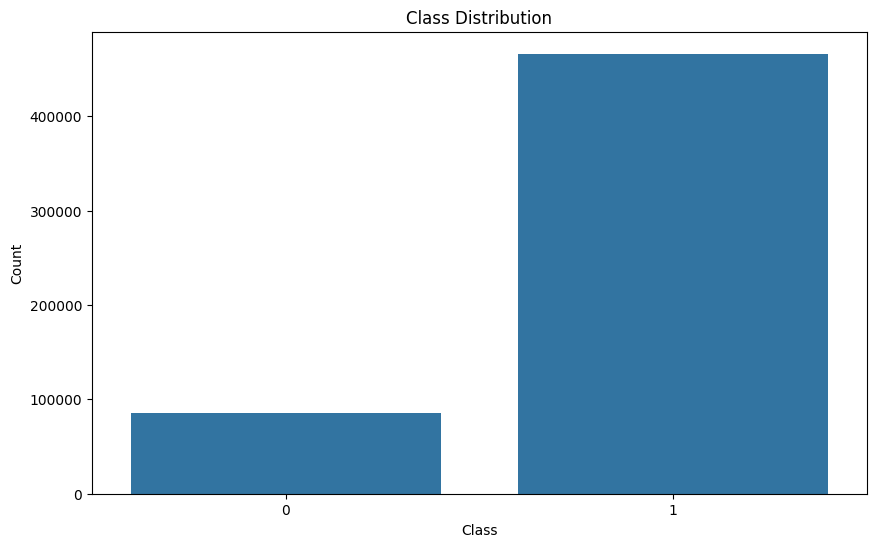

(Counter({1: 466356, 0: 85306}), 5.4668604787470985)

In [2]:
dataset_path = "DatasetClassification/TrainDataset.csv"
dataset_dt = pd.read_csv(dataset_path)
y = dataset_dt["label"]
analyze_class_imbalance(y)

### Deminsionaty reduction with Autoencoder

Class Distribution:
Class 0: 466356 samples (50.00%)
Class 1: 466356 samples (50.00%)

Imbalance Ratio: 1.00


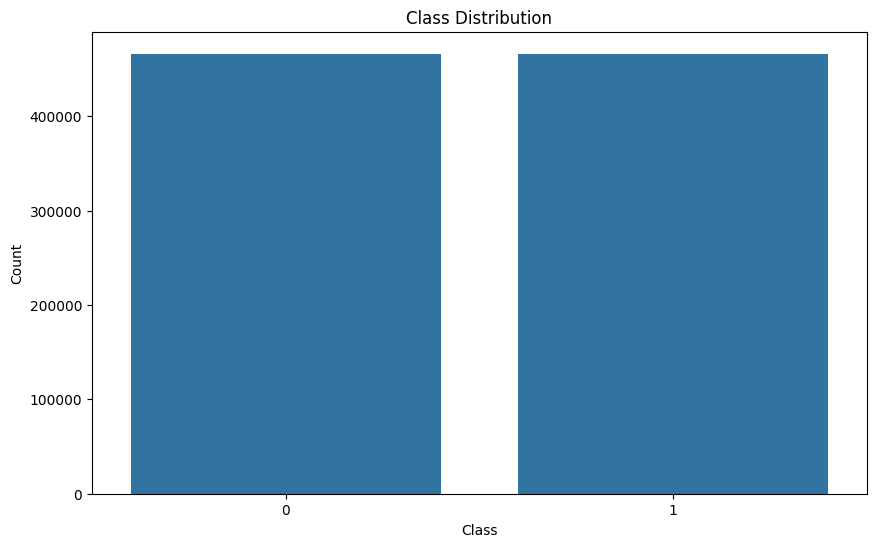

(Counter({0: 466356, 1: 466356}), 1.0)

In [3]:
model_path =  os.path.abspath(os.path.join(os.getcwd(), "models/autoencoder"))
for file in os.listdir(model_path):
    if file.endswith(".pt"):
        model_path = os.path.join(model_path, file)
        break
dataset = OurDataset(dataset_path)

data_input = dataset.to_tensor()

autoencoder = Autoencoder(
            data_input.shape[1], 3,
            [0.5], "Tanhshrink", "AdamW"
)

with open(model_path, "rb") as fp:
    ae_state_dict = torch.load(fp, weights_only=True)
autoencoder.load_state_dict(ae_state_dict)

with torch.no_grad():
    encoded_data = autoencoder.encoder(data_input)

x_balanced, y_balanced  = balance_dataset(encoded_data, y, method="smote")

analyze_class_imbalance(y_balanced)


### Training the classifier

In [4]:

main_classifier(
    data=torch.from_numpy(x_balanced), labels=torch.from_numpy(y_balanced.to_numpy()),
    num_samples=7, max_num_epochs=10)

2024-12-29 11:04:47,553	INFO worker.py:1821 -- Started a local Ray instance.
2024-12-29 11:04:47,964	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(func pid=62384) Fold 1


(func pid=62382) GPU available: True (cuda), used: True
(func pid=62382) TPU available: False, using: 0 TPU cores
(func pid=62382) HPU available: False, using: 0 HPUs
(func pid=62384) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62384) 
(func pid=62384)   | Name      | Type           | Params | Mode 
(func pid=62384) -----------------------------------------------------
(func pid=62384) 0 | model     | Sequential     | 257    | train
(func pid=62384) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62384) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62384) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62384) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62384) -----------------------------------------------------
(func pid=62384) 257       Trainable params
(func pid=62384) 0         Non-trainable params
(func pid=62384) 257       Total params
(func pid=62384) 0.001     Total estimated model params size (MB)
(func pid=62384) 14       

(func pid=62384) Fold 2 [repeated 4x across cluster]


(func pid=62384) 


(func pid=62385) Fold 2


(func pid=62385) `Trainer.fit` stopped: `max_epochs=10` reached.
(func pid=62384) GPU available: True (cuda), used: True
(func pid=62384) TPU available: False, using: 0 TPU cores
(func pid=62384) HPU available: False, using: 0 HPUs
(func pid=62384) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62384)   | Name      | Type           | Params | Mode 
(func pid=62384) ----------------------------------------------------- [repeated 2x across cluster]
(func pid=62384) 0 | model     | Sequential     | 257    | train
(func pid=62384) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62384) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62384) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62384) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62384) 257       Trainable params
(func pid=62384) 0         Non-trainable params
(func pid=62384) 257       Total params
(func pid=62384) 0.001     Total estimated model params size (MB)
(func pid=62384) 14  

(func pid=62384) Fold 3


(func pid=62384) GPU available: True (cuda), used: True
(func pid=62384) TPU available: False, using: 0 TPU cores
(func pid=62384) HPU available: False, using: 0 HPUs
(func pid=62384) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62384) 
(func pid=62384)   | Name      | Type           | Params | Mode 
(func pid=62384) 0 | model     | Sequential     | 257    | train
(func pid=62384) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62384) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62384) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62384) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62384) 257       Trainable params
(func pid=62384) 0         Non-trainable params
(func pid=62384) 257       Total params
(func pid=62384) 0.001     Total estimated model params size (MB)
(func pid=62384) 14        Modules in train mode
(func pid=62384) 0         Modules in eval mode
(func pid=62385) `Trainer.fit` stopped: `max_epochs=10` reached.
(func 

(func pid=62385) Fold 3


(func pid=62385) GPU available: True (cuda), used: True
(func pid=62385) TPU available: False, using: 0 TPU cores
(func pid=62385) HPU available: False, using: 0 HPUs
(func pid=62385) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62385) 
(func pid=62385)   | Name      | Type           | Params | Mode 
(func pid=62385) 0 | model     | Sequential     | 257    | train
(func pid=62385) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62385) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62385) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62385) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62385) 257       Trainable params
(func pid=62385) 0         Non-trainable params
(func pid=62385) 257       Total params
(func pid=62385) 0.001     Total estimated model params size (MB)
(func pid=62385) 14        Modules in train mode
(func pid=62385) 0         Modules in eval mode


(func pid=62382) Fold 2


(func pid=62382) `Trainer.fit` stopped: `max_epochs=10` reached.
(func pid=62385) ----------------------------------------------------- [repeated 2x across cluster]
(func pid=62382) GPU available: True (cuda), used: True
(func pid=62382) TPU available: False, using: 0 TPU cores
(func pid=62382) HPU available: False, using: 0 HPUs
(func pid=62382) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62382) 
(func pid=62382)   | Name      | Type           | Params | Mode 
(func pid=62382) 0 | model     | Sequential     | 449    | train
(func pid=62382) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62382) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62382) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62382) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62382) 449       Trainable params
(func pid=62382) 0         Non-trainable params
(func pid=62382) 449       Total params
(func pid=62382) 0.002     Total estimated model params size (MB)
(fu

(func pid=62383) Fold 2


(func pid=62383) GPU available: True (cuda), used: True
(func pid=62383) TPU available: False, using: 0 TPU cores
(func pid=62383) HPU available: False, using: 0 HPUs
(func pid=62383) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62383) 
(func pid=62383)   | Name      | Type           | Params | Mode 
(func pid=62383) 0 | model     | Sequential     | 257    | train
(func pid=62383) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62383) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62383) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62383) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62383) 257       Trainable params
(func pid=62383) 0         Non-trainable params
(func pid=62383) 257       Total params
(func pid=62383) 0.001     Total estimated model params size (MB)
(func pid=62383) 14        Modules in train mode
(func pid=62383) 0         Modules in eval mode
(func pid=62384) `Trainer.fit` stopped: `max_epochs=10` reached.
(func 

(func pid=62384) Fold 4


(func pid=62384) GPU available: True (cuda), used: True
(func pid=62384) TPU available: False, using: 0 TPU cores
(func pid=62384) HPU available: False, using: 0 HPUs
(func pid=62384) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62384) 
(func pid=62384)   | Name      | Type           | Params | Mode 
(func pid=62384) 0 | model     | Sequential     | 257    | train
(func pid=62384) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62384) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62384) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62384) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62384) 257       Trainable params
(func pid=62384) 0         Non-trainable params
(func pid=62384) 257       Total params
(func pid=62384) 0.001     Total estimated model params size (MB)
(func pid=62384) 14        Modules in train mode
(func pid=62384) 0         Modules in eval mode
(func pid=62385) `Trainer.fit` stopped: `max_epochs=10` reached.
(func 

(func pid=62385) Fold 4


(func pid=62385) GPU available: True (cuda), used: True
(func pid=62385) TPU available: False, using: 0 TPU cores
(func pid=62385) HPU available: False, using: 0 HPUs
(func pid=62385) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62385) 
(func pid=62385)   | Name      | Type           | Params | Mode 
(func pid=62385) 0 | model     | Sequential     | 257    | train
(func pid=62385) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62385) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62385) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62385) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62385) 257       Trainable params
(func pid=62385) 0         Non-trainable params
(func pid=62385) 257       Total params
(func pid=62385) 0.001     Total estimated model params size (MB)
(func pid=62385) 14        Modules in train mode
(func pid=62385) 0         Modules in eval mode
(func pid=62384) `Trainer.fit` stopped: `max_epochs=10` reached.
(func 

(func pid=62384) Fold 5


(func pid=62384) GPU available: True (cuda), used: True
(func pid=62384) TPU available: False, using: 0 TPU cores
(func pid=62384) HPU available: False, using: 0 HPUs
(func pid=62384) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62384) 
(func pid=62384)   | Name      | Type           | Params | Mode 
(func pid=62384) 0 | model     | Sequential     | 257    | train
(func pid=62384) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62384) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62384) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62384) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62384) 257       Trainable params
(func pid=62384) 0         Non-trainable params
(func pid=62384) 257       Total params
(func pid=62384) 0.001     Total estimated model params size (MB)
(func pid=62384) 14        Modules in train mode
(func pid=62384) 0         Modules in eval mode


(func pid=62385) Fold 5


(func pid=62385) `Trainer.fit` stopped: `max_epochs=10` reached.
(func pid=62384) ----------------------------------------------------- [repeated 2x across cluster]
(func pid=62385) GPU available: True (cuda), used: True
(func pid=62385) TPU available: False, using: 0 TPU cores
(func pid=62385) HPU available: False, using: 0 HPUs
(func pid=62385) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62385) 
(func pid=62385)   | Name      | Type           | Params | Mode 
(func pid=62385) 0 | model     | Sequential     | 257    | train
(func pid=62385) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62385) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62385) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62385) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62385) 257       Trainable params
(func pid=62385) 0         Non-trainable params
(func pid=62385) 257       Total params
(func pid=62385) 0.001     Total estimated model params size (MB)
(fu

(func pid=62382) Fold 3


(func pid=62382) `Trainer.fit` stopped: `max_epochs=10` reached.
(func pid=62385) ----------------------------------------------------- [repeated 2x across cluster]
(func pid=62382) GPU available: True (cuda), used: True
(func pid=62382) TPU available: False, using: 0 TPU cores
(func pid=62382) HPU available: False, using: 0 HPUs
(func pid=62382) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62382) 
(func pid=62382)   | Name      | Type           | Params | Mode 
(func pid=62382) 0 | model     | Sequential     | 449    | train
(func pid=62382) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62382) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62382) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62382) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62382) 449       Trainable params
(func pid=62382) 0         Non-trainable params
(func pid=62382) 449       Total params
(func pid=62382) 0.002     Total estimated model params size (MB)
(fu

Trial name,combined_metrics,should_checkpoint,val_auroc,val_f1,val_loss
train_classifier_wrapper_56109_00000,1.51955,True,0.51295,0.660132,0.69293
train_classifier_wrapper_56109_00001,1.39508,True,0.513777,0.534826,0.692948
train_classifier_wrapper_56109_00002,1.5282,True,0.51327,0.668484,0.692899
train_classifier_wrapper_56109_00003,1.6372,True,0.517314,0.773466,0.692844
train_classifier_wrapper_56109_00004,1.41127,True,0.507994,0.556705,0.693136
train_classifier_wrapper_56109_00005,1.48923,True,0.510307,0.632433,0.692978
train_classifier_wrapper_56109_00006,1.43773,True,0.506651,0.584497,0.693156


2024-12-29 12:05:16,767	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'act_fn': ('__ref_ph', '6f662850'), 'optimizer': ('__ref_ph', '46a9caad')}
2024-12-29 12:05:16,771	WARNING experiment_state.py:206 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds and may become a bottleneck. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this warning by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0). Set it to 0 to completely suppress this warning.
(func pid=62384) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/home/lesi-nedo/Desktop/master/second-year/fi

(func pid=147105) Fold 1


(func pid=147105) GPU available: True (cuda), used: True
(func pid=147105) TPU available: False, using: 0 TPU cores
(func pid=147105) HPU available: False, using: 0 HPUs
(func pid=147105) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=147105) 
(func pid=147105)   | Name      | Type           | Params | Mode 
(func pid=147105) 0 | model     | Sequential     | 225    | train
(func pid=147105) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=147105) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=147105) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=147105) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=147105) 225       Trainable params
(func pid=147105) 0         Non-trainable params
(func pid=147105) 225       Total params
(func pid=147105) 0.001     Total estimated model params size (MB)
(func pid=147105) 11        Modules in train mode
(func pid=147105) 0         Modules in eval mode
(func pid=62383) `Trainer.fit` stopped: `max_epochs=10

(func pid=62383) Fold 3


(func pid=62383) GPU available: True (cuda), used: True
(func pid=62383) TPU available: False, using: 0 TPU cores
(func pid=62383) HPU available: False, using: 0 HPUs
(func pid=62383) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62383) 
(func pid=62383)   | Name      | Type           | Params | Mode 
(func pid=62383) 0 | model     | Sequential     | 257    | train
(func pid=62383) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62383) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62383) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62383) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62383) 257       Trainable params
(func pid=62383) 0         Non-trainable params
(func pid=62383) 257       Total params
(func pid=62383) 0.001     Total estimated model params size (MB)
(func pid=62383) 14        Modules in train mode
(func pid=62383) 0         Modules in eval mode
(func pid=62385) `Trainer.fit` stopped: `max_epochs=10` reached.
(func 

(func pid=148759) Fold 1


(func pid=148759) GPU available: True (cuda), used: True
(func pid=148759) TPU available: False, using: 0 TPU cores
(func pid=148759) HPU available: False, using: 0 HPUs
(func pid=148759) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=148759) 
(func pid=148759)   | Name      | Type           | Params | Mode 
(func pid=148759) 0 | model     | Sequential     | 449    | train
(func pid=148759) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=148759) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=148759) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=148759) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=148759) 449       Trainable params
(func pid=148759) 0         Non-trainable params
(func pid=148759) 449       Total params
(func pid=148759) 0.002     Total estimated model params size (MB)
(func pid=148759) 11        Modules in train mode
(func pid=148759) 0         Modules in eval mode
(func pid=148759) `Trainer.fit` stopped: `max_epochs=1

(func pid=148759) Fold 2


(func pid=148759) GPU available: True (cuda), used: True
(func pid=148759) TPU available: False, using: 0 TPU cores
(func pid=148759) HPU available: False, using: 0 HPUs
(func pid=148759) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=148759) 
(func pid=148759)   | Name      | Type           | Params | Mode 
(func pid=148759) 0 | model     | Sequential     | 449    | train
(func pid=148759) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=148759) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=148759) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=148759) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=148759) 449       Trainable params
(func pid=148759) 0         Non-trainable params
(func pid=148759) 449       Total params
(func pid=148759) 0.002     Total estimated model params size (MB)
(func pid=148759) 11        Modules in train mode
(func pid=148759) 0         Modules in eval mode
(func pid=148759) `Trainer.fit` stopped: `max_epochs=1

(func pid=148759) Fold 3


(func pid=148759) GPU available: True (cuda), used: True
(func pid=148759) TPU available: False, using: 0 TPU cores
(func pid=148759) HPU available: False, using: 0 HPUs
(func pid=148759) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=148759) 
(func pid=148759)   | Name      | Type           | Params | Mode 
(func pid=148759) 0 | model     | Sequential     | 449    | train
(func pid=148759) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=148759) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=148759) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=148759) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=148759) 449       Trainable params
(func pid=148759) 0         Non-trainable params
(func pid=148759) 449       Total params
(func pid=148759) 0.002     Total estimated model params size (MB)
(func pid=148759) 11        Modules in train mode
(func pid=148759) 0         Modules in eval mode
(func pid=147105) `Trainer.fit` stopped: `max_epochs=1

(func pid=147105) Fold 2


(func pid=147105) GPU available: True (cuda), used: True
(func pid=147105) TPU available: False, using: 0 TPU cores
(func pid=147105) HPU available: False, using: 0 HPUs
(func pid=147105) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=147105) 
(func pid=147105)   | Name      | Type           | Params | Mode 
(func pid=147105) 0 | model     | Sequential     | 225    | train
(func pid=147105) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=147105) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=147105) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=147105) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=147105) 225       Trainable params
(func pid=147105) 0         Non-trainable params
(func pid=147105) 225       Total params
(func pid=147105) 0.001     Total estimated model params size (MB)
(func pid=147105) 11        Modules in train mode
(func pid=147105) 0         Modules in eval mode
(func pid=148759) `Trainer.fit` stopped: `max_epochs=1

(func pid=148759) Fold 4


(func pid=148759) GPU available: True (cuda), used: True
(func pid=148759) TPU available: False, using: 0 TPU cores
(func pid=148759) HPU available: False, using: 0 HPUs
(func pid=148759) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=148759) 
(func pid=148759)   | Name      | Type           | Params | Mode 
(func pid=148759) 0 | model     | Sequential     | 449    | train
(func pid=148759) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=148759) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=148759) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=148759) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=148759) 449       Trainable params
(func pid=148759) 0         Non-trainable params
(func pid=148759) 449       Total params
(func pid=148759) 0.002     Total estimated model params size (MB)
(func pid=148759) 11        Modules in train mode
(func pid=148759) 0         Modules in eval mode
(func pid=148759) `Trainer.fit` stopped: `max_epochs=1

(func pid=148759) Fold 5


(func pid=148759) GPU available: True (cuda), used: True
(func pid=148759) TPU available: False, using: 0 TPU cores
(func pid=148759) HPU available: False, using: 0 HPUs
(func pid=148759) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=148759) 
(func pid=148759)   | Name      | Type           | Params | Mode 
(func pid=148759) 0 | model     | Sequential     | 449    | train
(func pid=148759) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=148759) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=148759) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=148759) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=148759) 449       Trainable params
(func pid=148759) 0         Non-trainable params
(func pid=148759) 449       Total params
(func pid=148759) 0.002     Total estimated model params size (MB)
(func pid=148759) 11        Modules in train mode
(func pid=148759) 0         Modules in eval mode
(func pid=147105) `Trainer.fit` stopped: `max_epochs=1

(func pid=147105) Fold 3


(func pid=147105) GPU available: True (cuda), used: True
(func pid=147105) TPU available: False, using: 0 TPU cores
(func pid=147105) HPU available: False, using: 0 HPUs
(func pid=147105) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=147105) 
(func pid=147105)   | Name      | Type           | Params | Mode 
(func pid=147105) 0 | model     | Sequential     | 225    | train
(func pid=147105) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=147105) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=147105) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=147105) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=147105) 225       Trainable params
(func pid=147105) 0         Non-trainable params
(func pid=147105) 225       Total params
(func pid=147105) 0.001     Total estimated model params size (MB)
(func pid=147105) 11        Modules in train mode
(func pid=147105) 0         Modules in eval mode
(func pid=148759) `Trainer.fit` stopped: `max_epochs=1

(func pid=182892) Fold 1


(func pid=182892) GPU available: True (cuda), used: True
(func pid=182892) TPU available: False, using: 0 TPU cores
(func pid=182892) HPU available: False, using: 0 HPUs
(func pid=182892) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=182892) 
(func pid=182892)   | Name      | Type           | Params | Mode 
(func pid=182892) -----------------------------------------------------
(func pid=182892) 0 | model     | Sequential     | 257    | train
(func pid=182892) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=182892) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=182892) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=182892) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=182892) -----------------------------------------------------
(func pid=182892) 257       Trainable params
(func pid=182892) 0         Non-trainable params
(func pid=182892) 257       Total params
(func pid=182892) 0.001     Total estimated model params size (MB)
(func pid

(func pid=62382) Fold 4


(func pid=62382) GPU available: True (cuda), used: True
(func pid=62382) TPU available: False, using: 0 TPU cores
(func pid=62382) HPU available: False, using: 0 HPUs
(func pid=62382) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62382) 
(func pid=62382)   | Name      | Type           | Params | Mode 
(func pid=62382) -----------------------------------------------------
(func pid=62382) 0 | model     | Sequential     | 449    | train
(func pid=62382) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62382) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62382) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62382) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62382) -----------------------------------------------------
(func pid=62382) 449       Trainable params
(func pid=62382) 0         Non-trainable params
(func pid=62382) 449       Total params
(func pid=62382) 0.002     Total estimated model params size (MB)
(func pid=62382) 11       

(func pid=62383) Fold 4


(func pid=62383) GPU available: True (cuda), used: True
(func pid=62383) TPU available: False, using: 0 TPU cores
(func pid=62383) HPU available: False, using: 0 HPUs
(func pid=62383) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62383) 
(func pid=62383)   | Name      | Type           | Params | Mode 
(func pid=62383) -----------------------------------------------------
(func pid=62383) 0 | model     | Sequential     | 257    | train
(func pid=62383) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62383) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62383) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62383) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62383) -----------------------------------------------------
(func pid=62383) 257       Trainable params
(func pid=62383) 0         Non-trainable params
(func pid=62383) 257       Total params
(func pid=62383) 0.001     Total estimated model params size (MB)
(func pid=62383) 14       

(func pid=147105) Fold 4


(func pid=147105) GPU available: True (cuda), used: True
(func pid=147105) TPU available: False, using: 0 TPU cores
(func pid=147105) HPU available: False, using: 0 HPUs
(func pid=147105) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=147105) 
(func pid=147105)   | Name      | Type           | Params | Mode 
(func pid=147105) -----------------------------------------------------
(func pid=147105) 0 | model     | Sequential     | 225    | train
(func pid=147105) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=147105) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=147105) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=147105) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=147105) -----------------------------------------------------
(func pid=147105) 225       Trainable params
(func pid=147105) 0         Non-trainable params
(func pid=147105) 225       Total params
(func pid=147105) 0.001     Total estimated model params size (MB)
(func pid

(func pid=182892) Fold 2


(func pid=182892) GPU available: True (cuda), used: True
(func pid=182892) TPU available: False, using: 0 TPU cores
(func pid=182892) HPU available: False, using: 0 HPUs
(func pid=182892) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=182892) 
(func pid=182892)   | Name      | Type           | Params | Mode 
(func pid=182892) -----------------------------------------------------
(func pid=182892) 0 | model     | Sequential     | 257    | train
(func pid=182892) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=182892) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=182892) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=182892) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=182892) -----------------------------------------------------
(func pid=182892) 257       Trainable params
(func pid=182892) 0         Non-trainable params
(func pid=182892) 257       Total params
(func pid=182892) 0.001     Total estimated model params size (MB)
(func pid

(func pid=147105) Fold 5


(func pid=147105) GPU available: True (cuda), used: True
(func pid=147105) TPU available: False, using: 0 TPU cores
(func pid=147105) HPU available: False, using: 0 HPUs
(func pid=147105) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=147105) 
(func pid=147105)   | Name      | Type           | Params | Mode 
(func pid=147105) -----------------------------------------------------
(func pid=147105) 0 | model     | Sequential     | 225    | train
(func pid=147105) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=147105) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=147105) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=147105) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=147105) -----------------------------------------------------
(func pid=147105) 225       Trainable params
(func pid=147105) 0         Non-trainable params
(func pid=147105) 225       Total params
(func pid=147105) 0.001     Total estimated model params size (MB)
(func pid

(func pid=182892) Fold 3


(func pid=182892) GPU available: True (cuda), used: True
(func pid=182892) TPU available: False, using: 0 TPU cores
(func pid=182892) HPU available: False, using: 0 HPUs
(func pid=182892) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=182892) 
(func pid=182892)   | Name      | Type           | Params | Mode 
(func pid=182892) -----------------------------------------------------
(func pid=182892) 0 | model     | Sequential     | 257    | train
(func pid=182892) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=182892) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=182892) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=182892) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=182892) -----------------------------------------------------
(func pid=182892) 257       Trainable params
(func pid=182892) 0         Non-trainable params
(func pid=182892) 257       Total params
(func pid=182892) 0.001     Total estimated model params size (MB)
(func pid

(func pid=62382) Fold 5


(func pid=62382) GPU available: True (cuda), used: True
(func pid=62382) TPU available: False, using: 0 TPU cores
(func pid=62382) HPU available: False, using: 0 HPUs
(func pid=62382) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62382) 
(func pid=62382)   | Name      | Type           | Params | Mode 
(func pid=62382) -----------------------------------------------------
(func pid=62382) 0 | model     | Sequential     | 449    | train
(func pid=62382) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62382) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62382) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62382) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62382) -----------------------------------------------------
(func pid=62382) 449       Trainable params
(func pid=62382) 0         Non-trainable params
(func pid=62382) 449       Total params
(func pid=62382) 0.002     Total estimated model params size (MB)
(func pid=62382) 11       

(func pid=62383) Fold 5


(func pid=62383) GPU available: True (cuda), used: True
(func pid=62383) TPU available: False, using: 0 TPU cores
(func pid=62383) HPU available: False, using: 0 HPUs
(func pid=62383) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=62383) 
(func pid=62383)   | Name      | Type           | Params | Mode 
(func pid=62383) -----------------------------------------------------
(func pid=62383) 0 | model     | Sequential     | 257    | train
(func pid=62383) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=62383) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=62383) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=62383) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=62383) -----------------------------------------------------
(func pid=62383) 257       Trainable params
(func pid=62383) 0         Non-trainable params
(func pid=62383) 257       Total params
(func pid=62383) 0.001     Total estimated model params size (MB)
(func pid=62383) 14       

(func pid=182892) Fold 4


(func pid=182892) GPU available: True (cuda), used: True
(func pid=182892) TPU available: False, using: 0 TPU cores
(func pid=182892) HPU available: False, using: 0 HPUs
(func pid=182892) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=182892) 
(func pid=182892)   | Name      | Type           | Params | Mode 
(func pid=182892) -----------------------------------------------------
(func pid=182892) 0 | model     | Sequential     | 257    | train
(func pid=182892) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=182892) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=182892) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=182892) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=182892) -----------------------------------------------------
(func pid=182892) 257       Trainable params
(func pid=182892) 0         Non-trainable params
(func pid=182892) 257       Total params
(func pid=182892) 0.001     Total estimated model params size (MB)
(func pid

(func pid=182892) Fold 5


(func pid=182892) GPU available: True (cuda), used: True
(func pid=182892) TPU available: False, using: 0 TPU cores
(func pid=182892) HPU available: False, using: 0 HPUs
(func pid=182892) LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
(func pid=182892) 
(func pid=182892)   | Name      | Type           | Params | Mode 
(func pid=182892) -----------------------------------------------------
(func pid=182892) 0 | model     | Sequential     | 257    | train
(func pid=182892) 1 | train_acc | BinaryAccuracy | 0      | train
(func pid=182892) 2 | val_acc   | BinaryAccuracy | 0      | train
(func pid=182892) 3 | f1_score  | BinaryF1Score  | 0      | train
(func pid=182892) 4 | auroc     | BinaryAUROC    | 0      | train
(func pid=182892) -----------------------------------------------------
(func pid=182892) 257       Trainable params
(func pid=182892) 0         Non-trainable params
(func pid=182892) 257       Total params
(func pid=182892) 0.001     Total estimated model params size (MB)
(func pid

Best trial config: {'hidden_dims': [16, 8], 'batch_size': 32, 'act_fn': SELU(), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'dropout': 0.2970391488998608, 'config_optimizer': {'weight_decay': 2.4042319093392074e-05, 'lr': 0.006628639336523737}}
Best combined metrics: 1.395076758041978
Best validation loss: 0.6929476737976075
Best validation F1: 0.5348256412893534
Best validation AUROC: 0.5137772798538208
Best checkpoint path: Checkpoint(filesystem=local, path=/home/lesi-nedo/Desktop/master/second-year/first-semester/DM/DataMining-unipi-24-25-O/models/ray_classifier/train_classifier_wrapper_2024-12-29_11-04-47/train_classifier_wrapper_56109_00001_1_act_fn=ref_ph_45b864f2,batch_size=32,lr=0.0066,weight_decay=0.0000,dropout=0.2970,hidden_di_2024-12-29_11-04-47/checkpoint_000000)


(train_classifier_wrapper_56109_00001,
 {'hidden_dims': [16, 8],
  'batch_size': 32,
  'act_fn': SELU(),
  'optimizer': torch.optim.adamw.AdamW,
  'dropout': 0.2970391488998608,
  'config_optimizer': {'weight_decay': 2.4042319093392074e-05,
   'lr': 0.006628639336523737}},
 Checkpoint(filesystem=local, path=/home/lesi-nedo/Desktop/master/second-year/first-semester/DM/DataMining-unipi-24-25-O/models/ray_classifier/train_classifier_wrapper_2024-12-29_11-04-47/train_classifier_wrapper_56109_00001_1_act_fn=ref_ph_45b864f2,batch_size=32,lr=0.0066,weight_decay=0.0000,dropout=0.2970,hidden_di_2024-12-29_11-04-47/checkpoint_000000))